# FRAUD DETECTION SYSTEM

In [2]:
!pip install imblearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set(style="whitegrid")

In [2]:
df =pd.read_csv("creditcard.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [3]:
df.shape

(100000, 7)

In [4]:
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


# Step 2: Data Preprocessing


In [6]:
target_column = 'Class'  
feature_columns = [col for col in df.columns if col != target_column]

# Features and target
X = df[feature_columns]
y = df[target_column]

# Handle missing values (if any)
X = X.fillna(X.median())  # Impute numerical features with median
y = y.fillna(0)  #t if needed)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

# Apply SMOTE
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Resampled Training Set Shape:", X_train_resampled.shape)
print("Resampled Class Distribution:\n", pd.Series(y_train_resampled).value_counts())

NameError: name 'data' is not defined

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
print("Training Random Forest model...")
model.fit(X_train_resampled, y_train_resampled)

Training Random Forest model...


RandomForestClassifier(n_jobs=-1, random_state=42)

# Step 4: Model Evaluation


=== Model Evaluation ===
Precision: 0.8351
Recall: 0.8265
F1-Score: 0.8308

Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     56864
       Fraud       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Lenovo\\Desktop\\internship\\developer hub\\fraud_detection\\confusion_matrix.png'

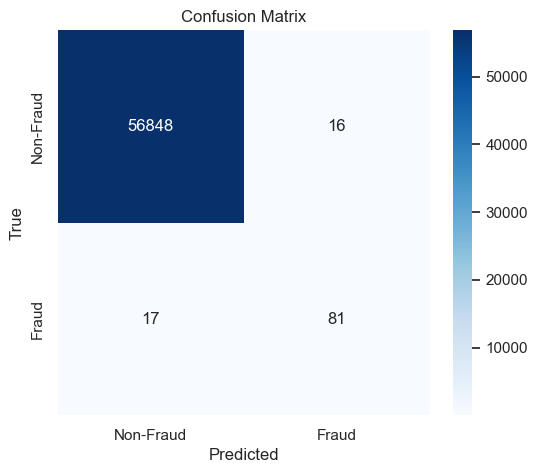

In [10]:
y_pred = model.predict(X_test)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== Model Evaluation ===")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('fraud_detection/confusion_matrix.png')
plt.show()

In [ ]:
def predict_fraud(transaction, model, feature_columns):
    try:
        transaction_df = pd.DataFrame([transaction], columns=feature_columns)
        prediction = model.predict(transaction_df)[0]
        return "Fraudulent" if prediction == 1 else "Non-Fraudulent"
    except Exception as e:
        return f"Error: {str(e)}"

def testing_interface(model, feature_columns):
    print("\n=== Fraud Detection Testing Interface ===")
    print("Enter transaction details (or type 'exit' to quit).")
    print(f"Format: Key=Value, e.g., {','.join([f'{col}=0' for col in feature_columns[:3]])}...,{feature_columns[-1]}=0")
    
    while True:
        user_input = input("\nEnter transaction: ")
        if user_input.lower() == 'exit':
            print("Exiting interface.")
            break
        
        try:
            transaction = {}
            pairs = user_input.split(',')
            for pair in pairs:
                key, value = pair.split('=')
                transaction[key.strip()] = float(value.strip())
            
            if set(transaction.keys()) != set(feature_columns):
                print("Error: Provide all features:", feature_columns)
                continue
            
            result = predict_fraud(transaction, model, feature_columns)
            print(f"Prediction: {result}")
        except Exception as e:
            print(f"Error: Invalid input. {str(e)}")

# Run interface
if __name__ == "__main__":
    testing_interface(model, feature_columns)


=== Fraud Detection Testing Interface ===
Enter transaction details (or type 'exit' to quit).
Format: Key=Value, e.g., Time=0,V1=0,V2=0...,Amount=0



Enter transaction:  5000


Error: Invalid input. not enough values to unpack (expected 2, got 1)



Enter transaction:  2


Error: Invalid input. not enough values to unpack (expected 2, got 1)



Enter transaction:  1


Error: Invalid input. not enough values to unpack (expected 2, got 1)



Enter transaction:  0.1


Error: Invalid input. not enough values to unpack (expected 2, got 1)



Enter transaction:  0


Error: Invalid input. not enough values to unpack (expected 2, got 1)



Enter transaction:  hlo


Error: Invalid input. not enough values to unpack (expected 2, got 1)
